In [1]:
from symbulate import *
%matplotlib inline
from matplotlib import pyplot as plt

## Exer 16.1

First we define a function that takes as an input a sequence of 0/1 values and returns as an output when the first 1 occurs in the sequence.  

In [2]:
def count_until_first_success(omega):
    for i, w in enumerate(omega):
        if w == 1:
            return i + 1 # the +1 is because Python index starts at 0
        
count_until_first_success([0, 0, 0, 0, 1])

5

We can then use the above function to define a RV on a probability space.

(2.5114, 3.8658700400000003, 1.9661815887653917)

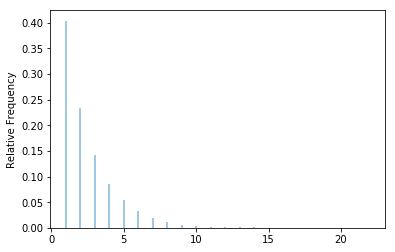

In [3]:
P = BoxModel([1, 0], probs=[0.4, 0.6], size=inf)
X = RV(P, count_until_first_success)
x = X.sim(10000)
x.plot()
x.mean(), x.var(), x.sd()

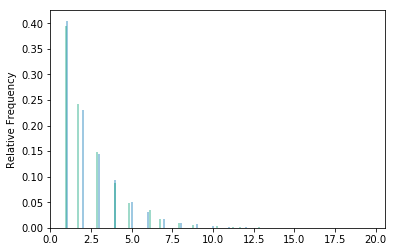

In [27]:
P = BoxModel([1, 0], probs=[0.4, 0.6], size=inf)
X = RV(P, count_until_first_success)
x = X.sim(10000)
x.plot()

RV(Geometric(p=0.4)).sim(10000).plot(jitter=True)

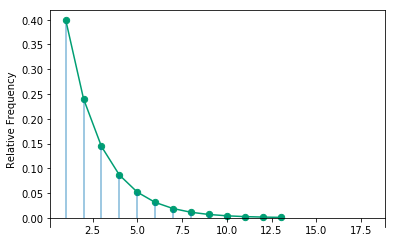

In [5]:
P = BoxModel([1, 0], probs=[0.4, 0.6], size=inf)
X = RV(P, count_until_first_success)
x = X.sim(10000)
x.plot()

Geometric(p=0.4).plot()

In [6]:
Geometric(p=0.4).pdf(3)

0.144

In [7]:
x = [1, 2, 3, 4, 5, 6, 7]
Geometric(p=0.4).pdf(x)

array([0.4      , 0.24     , 0.144    , 0.0864   , 0.05184  , 0.031104 ,
       0.0186624])

In [8]:
1 - Geometric(p=0.4).cdf(5)

0.07776000000000005

In [9]:
Geometric(p=0.4).mean()

2.5

In [10]:
Geometric(p=0.4).var()

3.749999999999999

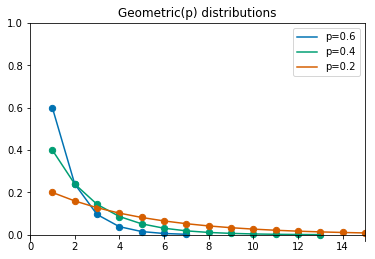

In [30]:
plt.xlim([1, 10])
plt.title('Geometric(p) distributions')

Geometric(p=0.6).plot()
Geometric(p=0.4).plot()
Geometric(p=0.2).plot()

plt.legend(['p=0.6', 'p=0.4', 'p=0.2']);
plt.xlim(0, 15);

In [12]:
Geometric(p=0.2).var(), Geometric(p=0.4).var(), Geometric(p=0.6).var()

(20.0, 3.749999999999999, 1.1111111111111114)

## Exer 16.2

First we define a function that takes as an input a sequence of 0/1 values and returns as an output when the rth 1 occurs in the sequence.

In [13]:
r = 5
def count_until_rth_success(omega):
    trials_so_far = []
    for i, w in enumerate(omega):
        trials_so_far.append(w)
        if sum(trials_so_far) == r:
            return i + 1 
        
count_until_rth_success([0, 0, 0, 0, 1, 1, 1, 0, 1, 1])

10

We can then use the above function to define a RV on a probability space.

(6.2527, 1.56864271, 1.2524546738305542)

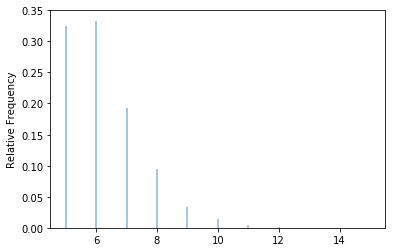

In [14]:
P = BoxModel([1, 0], probs=[0.8, 0.2], size=inf)
X = RV(P, count_until_rth_success)
x = X.sim(10000)
x.plot()
x.mean(), x.var(), x.sd()

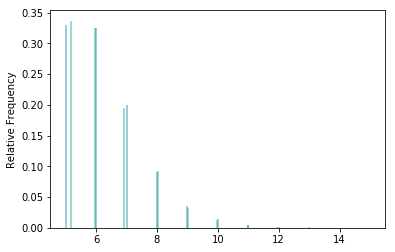

In [15]:
P = BoxModel([1, 0], probs=[0.8, 0.2], size=inf)
X = RV(P, count_until_rth_success)
X.sim(10000).plot()

RV(NegativeBinomial(r=5, p=0.8)).sim(10000).plot(jitter=True)

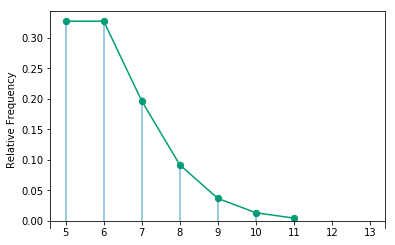

In [16]:
P = BoxModel([1, 0], probs=[0.8, 0.2], size=inf)
X = RV(P, count_until_rth_success)
X.sim(10000).plot()

NegativeBinomial(r=5, p=0.8).plot()

In [17]:
NegativeBinomial(r=5, p=0.8).pdf(5)

0.3276800000000001

In [18]:
x = [5, 6, 7, 8, 9, 10]
NegativeBinomial(r=5, p=0.8).pdf(x)

array([0.32768   , 0.32768   , 0.196608  , 0.0917504 , 0.03670016,
       0.01321206])

In [19]:
NegativeBinomial(r=5, p=0.8).mean()

6.25

In [20]:
NegativeBinomial(r=2, p=0.8).var(), NegativeBinomial(r=5, p=0.8).var(), NegativeBinomial(r=10, p=0.8).var() 

(0.625, 1.5625, 3.125)

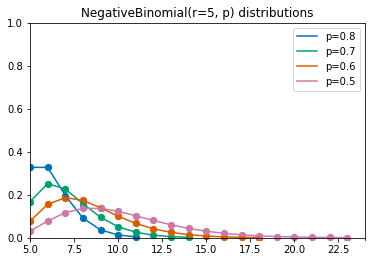

In [21]:
plt.xlim([5, 15])
plt.title('NegativeBinomial(r=5, p) distributions')

NegativeBinomial(r=5, p=0.8).plot()
NegativeBinomial(r=5, p=0.7).plot()
NegativeBinomial(r=5, p=0.6).plot()
NegativeBinomial(r=5, p=0.5).plot()

plt.legend(['p=0.8', 'p=0.7', 'p=0.6', 'p=0.5']);

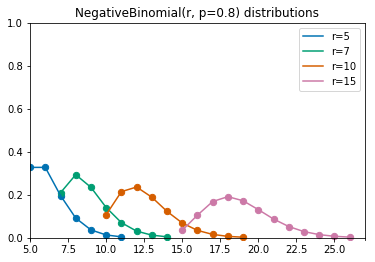

In [22]:
plt.xlim([5, 25])
plt.title('NegativeBinomial(r, p=0.8) distributions')

NegativeBinomial(r=5, p=0.8).plot()
NegativeBinomial(r=7, p=0.8).plot()
NegativeBinomial(r=10, p=0.8).plot()
NegativeBinomial(r=15, p=0.8).plot()

plt.legend(['r=5', 'r=7', 'r=10', 'r=15']);

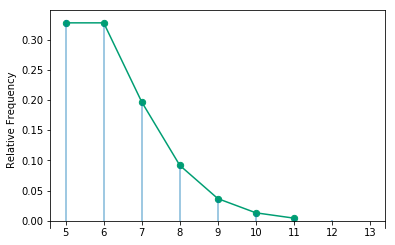

In [23]:
r = 5
p = 0.8
P = Geometric(p) ** r
X = RV(P, sum)
X.sim(10000).plot()
NegativeBinomial(r, p).plot()

## Exer 16.3

In [24]:
Binomial(n=8, p=0.5).pdf(4)

0.27343750000000017

In [25]:
NegativeBinomial(r=4, p=0.5).pdf(8)

0.1367187500000001

In [26]:
n = 100
for p in [0.50, 0.55, 0.60, 0.65, 0.7]:
    P = BoxModel([1, 0], probs=[p, 1-p], size=n)
    X = RV(P, sum)
    print(p, X.sim(10000).mean())

0.5 50.0555
0.55 55.0014
0.6 60.1154
0.65 65.008
0.7 69.9826
